<a href="https://colab.research.google.com/github/fabiosilva2022/Inteligencia_Artificial/blob/main/Rescalling_CNN_Gato_e_Cachorro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Rescaling
from tensorflow.keras.utils import to_categorical

In [2]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip -O dataset.zip

--2024-12-19 15:46:20--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.192.208.155, 2600:1409:12:2b7::317f, 2600:1409:12:299::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.192.208.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘dataset.zip’

dataset.zip         100%[===================>] 786.67M   123MB/s    in 6.5s    

2024-12-19 15:46:26 (120 MB/s) - ‘dataset.zip’ saved [824887076/824887076]



In [3]:
!unzip -q dataset.zip
!ls


 CDLA-Permissive-2.0.pdf   dataset.zip	 PetImages  'readme[1].txt'   sample_data


In [4]:
num_skipped = 0
for folder_name in ("Cat", "Dog"):
  folder_path = os.path.join("PetImages", folder_name)
  for fname in os.listdir(folder_path):
    fpath = os.path.join(folder_path, fname)
    try:
      fobj = open(fpath, "rb")
      is_jfif = b"JFIF" in fobj.peek(10)
    finally:
      fobj.close()

    if not is_jfif:
      num_skipped += 1
      os.remove(fpath)
print("Deleted images: {}".format(str(num_skipped)))

Deleted images: 1590


In [5]:
image_size = (180, 180)
batch_size = 128

train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    "PetImages",
    validation_split = 0.2,
    subset = "both",
    seed = 42,
    image_size = image_size,
    batch_size = batch_size
)

Found 23410 files belonging to 2 classes.
Using 18728 files for training.
Using 4682 files for validation.


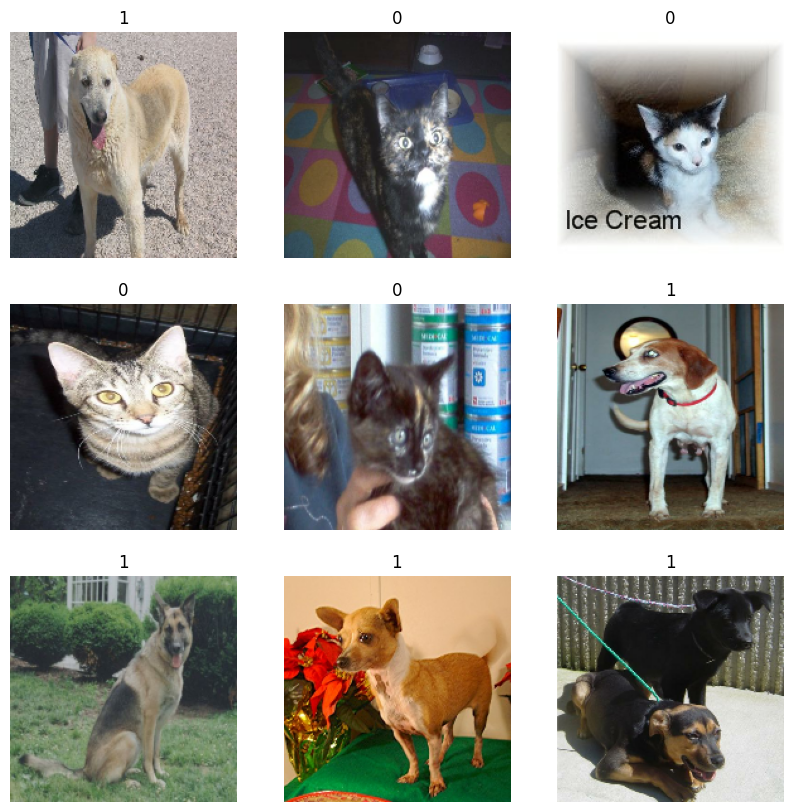

In [6]:
plt.figure(figsize = (10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(np.array(images[i]).astype('uint8'))
    plt.title(int(labels[i]))
    plt.axis('off')

In [7]:
model = Sequential([
    Rescaling(1./255),
    Conv2D(32, (3,3), activation='relu', input_shape=(180, 180, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds
)

Epoch 1/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 51s 254ms/step - accuracy: 0.5562 - loss: 0.7242 - val_accuracy: 0.7371 - val_loss: 0.5394
Epoch 2/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 63s 199ms/step - accuracy: 0.7391 - loss: 0.5241 - val_accuracy: 0.7787 - val_loss: 0.4677
Epoch 3/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 30s 200ms/step - accuracy: 0.7965 - loss: 0.4364 - val_accuracy: 0.8163 - val_loss: 0.3984
Epoch 4/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 29s 196ms/step - accuracy: 0.8360 - loss: 0.3655 - val_accuracy: 0.8046 - val_loss: 0.4269
Epoch 5/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 41s 199ms/step - accuracy: 0.8680 - loss: 0.2993 - val_accuracy: 0.8101 - val_loss: 0.4282
Epoch 6/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 44s 222ms/step - accuracy: 0.9065 - loss: 0.2201 - val_accuracy: 0.8150 - val_loss: 0.5126
Epoch 7/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 40s 215ms/step - accuracy: 0.9305 - loss: 0.1691 - val_accuracy: 0.8197 - val_loss: 0.6342
Epoch 8/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 35s 239ms/step - accuracy: 0.9633 - loss: 0

In [11]:
# Salvar o modelo treinado no formato .h5
model.save("modelo_cachorro_gato.h5")
print("Modelo salvo com sucesso!")

# Salvar o modelo treinado no formato .keras
model.save("modelo_cachorro_gato.keras")
print("Modelo salvo com sucesso!")

# Fazer download dos modelos salvos no PC
from google.colab import files
files.download('modelo_cachorro_gato.h5')
files.download('modelo_cachorro_gato.keras')

Modelo salvo com sucesso!
Modelo salvo com sucesso!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>